In [1]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterator, *args, **kwargs):
        return iterator
    
import numpy as np
import scipy as sp
from scipy import constants
from pylab import *
import joblib


import os,sys
from importlib import reload
import copy
sys.path.append("../tracker")

In [2]:
import kalmanfilter as KF
import utilities as Util
import trackfinder as TF
import datatypes
from datatypes import *

reload(TF)
reload(Util)

<module 'utilities' from '../tracker\\utilities.py'>

In [3]:
steel_height=0.03 #m
Box_IP_Depth=85.47#m
def coord_det2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """
    return np.array([vector_xyz[0]+119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_sim2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """
    return np.array([vector_xyz[1],      -vector_xyz[2]+Box_IP_Depth, vector_xyz[0]])*100 # turn to cm
def coord_det2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """    
    return coord_sim2cms(coord_det2sim(vector_xyz))

def coord_sim2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[0]-119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_cms2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return coord_sim2det(coord_cms2sim(vector_xyz))

def coord_cms2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[2],      vector_xyz[0], -vector_xyz[1]+Box_IP_Depth*100])/100 # turn to m    
    

In [104]:
events=joblib.load("events_example.joblib")
# events[17][:10]


In [124]:
hits = events[33]
reload(TF)
reload(Util)

<module 'utilities' from '../tracker\\utilities.py'>

In [150]:

# tf = TF.TrackFinder(method="recursive", debug=False)
tf = TF.TrackFinder(method="greedy", debug=False)
tf.parameters["cut_track_HitAddChi2"]=15
tf.parameters["cut_track_HitDropChi2"]=12
tf.parameters["cut_track_HitProjectionSigma"]=7
tf.parameters["cut_track_TrackChi2Reduced"]=4
tf.parameters["cut_track_TrackNHitsMin"]=3
tf.parameters["cut_track_TrackSpeed"] = [20,35]
tf.parameters["fit_track_MultipleScattering"]=True
tf.parameters["fit_track_Method"]="backward"
tf.parameters["fit_track_LeastSquareIters"] = 2
# %timeit -n 3 tf.run(hits)
tracks = tf.run(hits)
print(len(tracks))
joblib.dump(tracks, "tracks_example.joblib")

# for ev in events:
#     hits=events[ev]
#     tracks = tf.run(hits)
    

5


['tracks_example.joblib']

In [151]:
for track in tracks:
    # print(track.hits)
    print(np.sqrt(np.diag(track.cov)))

[2.12155753 1.2960241  0.59163579 0.01360834 0.01181952 0.00389639]
[1.29602454 2.11993877 0.59162451 0.01175746 0.01356838 0.0038955 ]
[2.12135489 1.29602348 0.59162529 0.01360336 0.01178682 0.00389557]
[1.29569083 2.99931803 0.59168451 0.01081689 0.0255737  0.00390265]
[1.29602941 2.3378286  0.5917027  0.01233617 0.01831051 0.0039026 ]


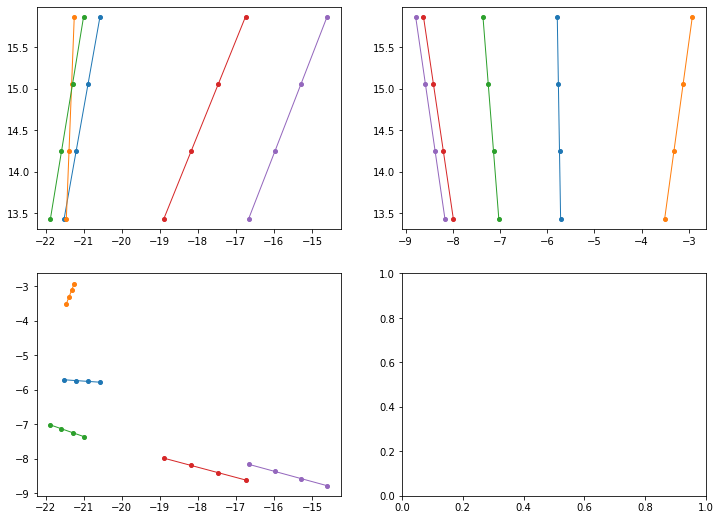

In [95]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label=track_label)

In [10]:
for track in tracks:
    print(np.diag(track.cov), track.chi2)

[4.98737829e+00 1.67972356e+00 3.50169521e-01 2.60876726e-04
 1.78156455e-04 1.52725604e-05] 7.6201693642501525
[1.67967994e+00 4.67296699e+00 3.50016237e-01 1.40755915e-04
 2.11940115e-04 1.51760566e-05] 6.403577302969067
[3.34107337e+01 1.58555007e+00 3.50031178e-01 4.65188555e-03
 1.24358947e-04 1.51877329e-05] 12.208559435093393
[5.25176317e+00 1.67975143e+00 3.50131682e-01 3.01944919e-04
 1.86273710e-04 1.52501609e-05] 15.323798462151785
[5.64448752e+00 1.67984410e+00 3.50355662e-01 3.62984904e-04
 2.38502669e-04 1.53817546e-05] 6.674305579212074
[5.15042867e+00 1.67971818e+00 3.50111997e-01 2.86293516e-04
 1.79635696e-04 1.52352114e-05] 2.944131258957048
[8.56185744e+00 1.67885773e+00 3.50129028e-01 5.85711258e-04
 1.86401812e-04 1.52467782e-05] 4.135340516481817
